#### Generate time series of random numbers then down sample

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# I want 7 days of 24 hours with 60 minutes each
periods = 7 * 24 * 60
tidx = pd.date_range('2016-07-01', periods=periods, freq='T')
#                        ^                             ^
#                        |                             |
#                   Start Date                Frequency Code for Minute
# This should get me 7 Days worth of minutes in a datetimeindex


In [2]:
# Generate random data with numpy. We'll seed the random
# number generator so that others can see the same results.
# Otherwise, you don't have to seed it.
np.random.seed([3,1415])


In [3]:
# This will pick a number of normally distributed random numbers
# where the number is specified by periods
data = np.random.randn(periods)


In [4]:
ts = pd.Series(data=data, index=tidx, name='HelloTimeSeries')
ts.describe()

count    10080.000000
mean        -0.008853
std          0.995411
min         -3.936794
25%         -0.683442
50%          0.002640
75%          0.654986
max          3.906053
Name: HelloTimeSeries, dtype: float64

#### Let's take this 7 days of per minute data and down sample to every 15 minutes. All frequency codes can be found here.

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [5]:
# resample says to group by every 15 minutes. But now we need
# to specify what to do within those 15 minute chunks.
# We could take the last value.
ts.resample('15T').last()

2016-07-01 00:00:00   -0.911575
2016-07-01 00:15:00    0.831452
2016-07-01 00:30:00    1.258253
2016-07-01 00:45:00   -0.017209
2016-07-01 01:00:00    0.025249
                         ...   
2016-07-07 22:45:00   -0.112963
2016-07-07 23:00:00   -1.684835
2016-07-07 23:15:00   -0.268678
2016-07-07 23:30:00    1.097568
2016-07-07 23:45:00   -0.543848
Freq: 15T, Name: HelloTimeSeries, Length: 672, dtype: float64

#### Or any other thing we can do to a groupby object

#### We can even aggregate several useful things. Let's plot the min, mean, and max of this resample('15M') data.


<AxesSubplot:>

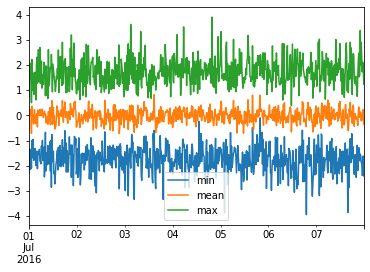

In [6]:
ts.resample('15T').agg(['min', 'mean', 'max']).plot()

#### Let's resample over '15T' (15 minutes), '30T' (half hour), and '1H' (1 hour) and see how our data gets smoother.

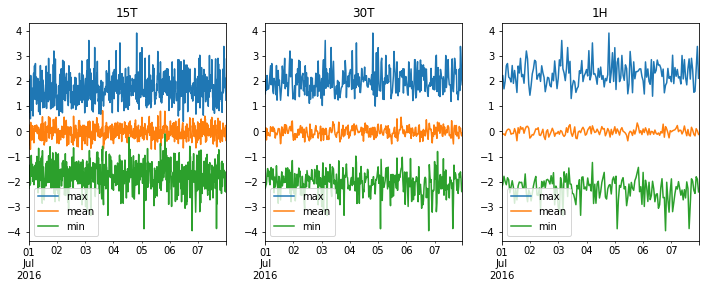

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, freq in enumerate(['15T', '30T', '1H']):
 ts.resample(freq).agg(['max', 'mean', 'min']).plot(ax=axes[i], title=freq)